Luiz Henrique Dal'Berto<br>
12/11/2023
# ✧Final Report✧

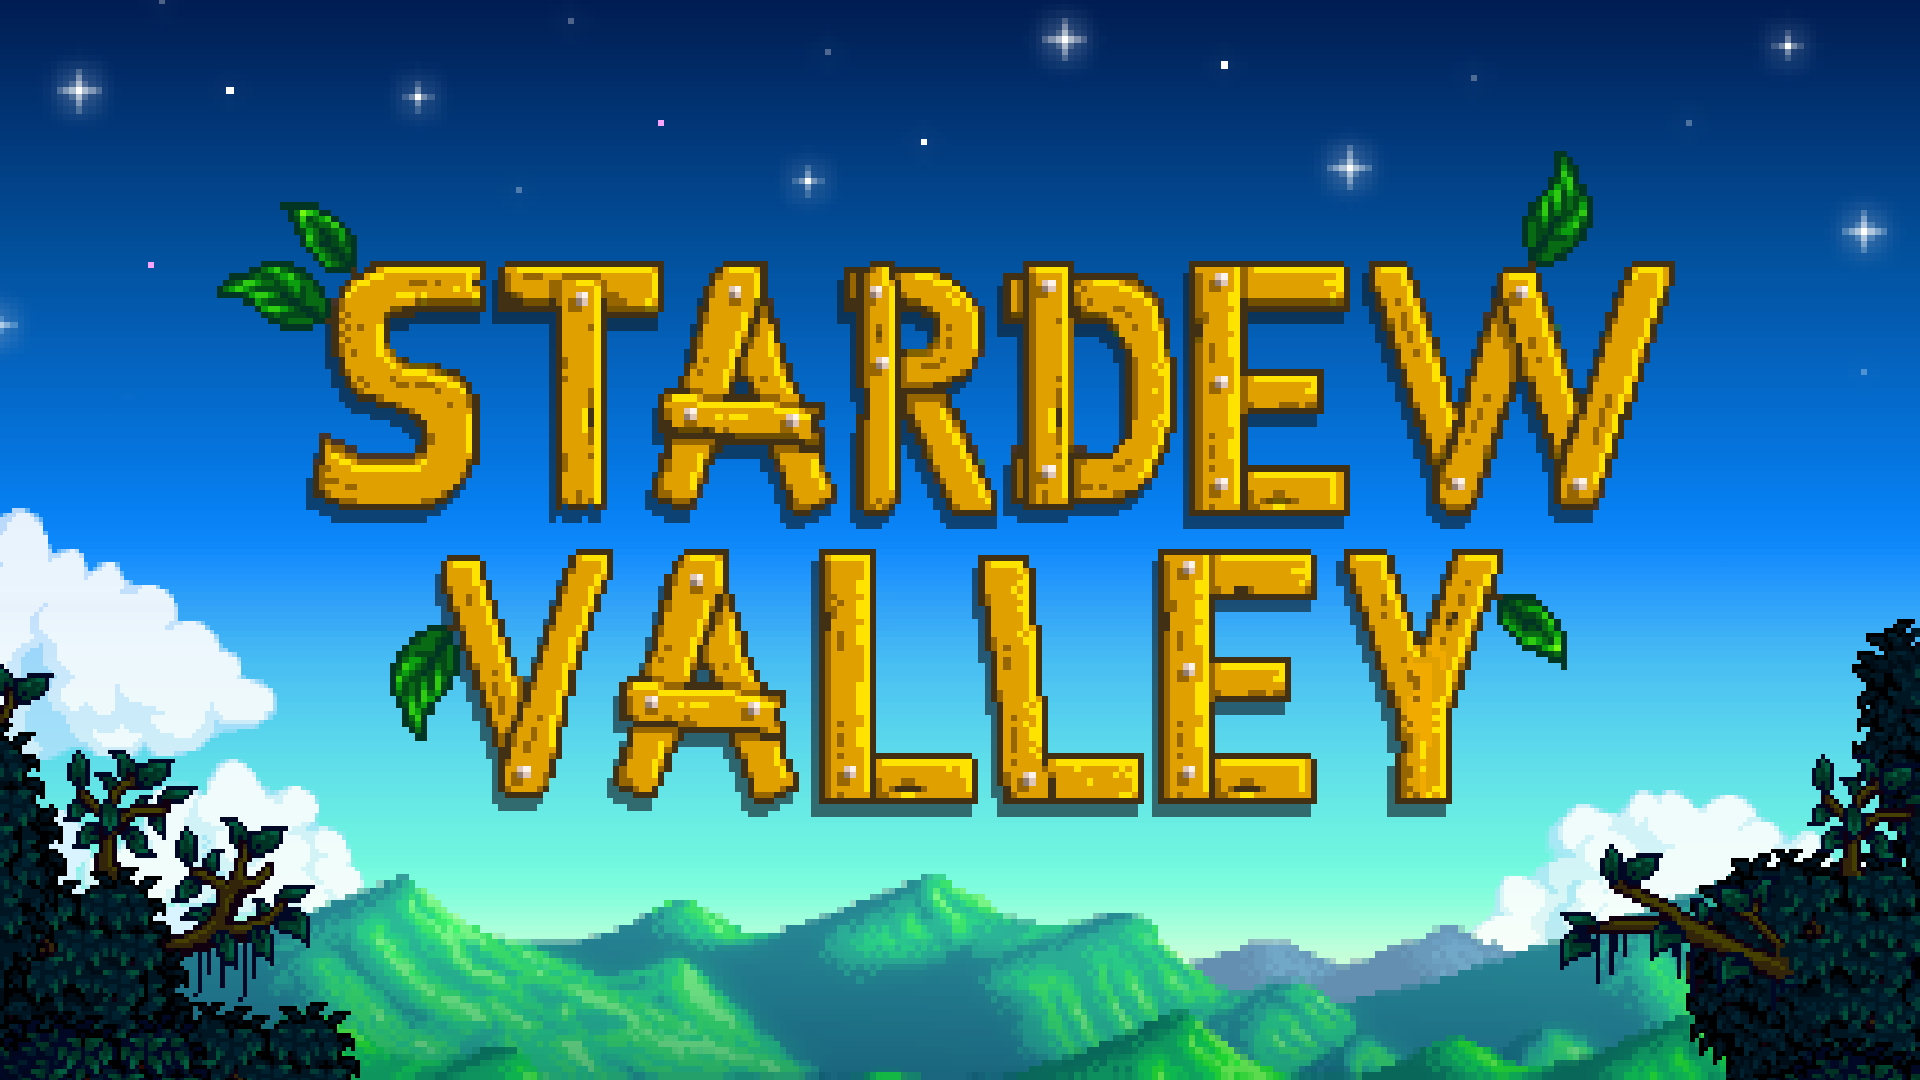
_Stardew Valley_

### ✧The Analysis✧

For my final project, I chose to analyze the seasonal profits for crops and fish for one of my favorite games: Stardew Valley! <b>I hypothesized that spring is the most profitable season for both fish and crops in Stardew Valley.</b> To test my hypothesis, I retrieved crops and fish data from <a href="https://stardewvalleywiki.com/Stardew_Valley_Wiki">the Stardew Valley wiki</a> and analyzed how each season affects crops and fish in the game. The primary objective of this project is not only to test my hypothesis but also to create a guide for players, informing them about the most profitable crops and fish during each season. What motivated me to do this project, aside from an opportunity to work with data from something I love, was that, while playing, I would frequently struggle with deciding what crops to plant and what fish to focus on catching. Therefore, this project facilitates my understanding of the game's economy by indicating what to do to earn more gold, and I hope it can be of use for other players as well.

<b>Info about the data:</b> As mentioned before, all the data from this analysis was sourced from <a href="https://stardewvalleywiki.com/Stardew_Valley_Wiki">the Stardew Valley wiki</a>. This is the most reliable source for Stardew Valley because the wiki is owned by the game creator, Eric Barone, and curated by the Stardew Valley community. Although the wiki can be edited by anyone with an account, there are moderators and administrators that supervise and correct wrongful information. Concerning the structure of the data, as I couldn't realize the data scraping process directly from the wiki, I built the data set used for this analysis by hand on Excel. To do this, I used a methodic process of sourcing the names of crops and fish, categorizing them by type, creating columns for seasons, and using binary code to indicate if the crop or fish was in that season. Additionally, I included a growth time column for the crops, and finally, four columns including the prices of crops and fish in all their rarities (normal, silver, gold, and iridium).

<b>Data considerations:</b> My initial idea was to display graphs with the prices of crops and fish in all rarities; however, while building the dataset, I realized that this method would not be productive because the prices of the items are directly proportional. Therefore, if an item is more valuable in its normal condition, it will still be the most valuable in its rarest condition, resulting in only the normal price being considered for this analysis. Additionally, it is important to consider that crops have growth times; therefore, when calculating their profit, growth time is relevant because it impacts on how many times the player might profit from that crop per season (a season lasts 28 in-game days). As for the fish data, an important aspect is that there are <b>legendary fish</b> that are worth considerably more than the other fish in the game. As some of them are also seasonal and catchable at all times in the game, they will also be taken into consideration, but they will always be the most profitable fish of the seasons. Another <b>crucial</b> consideration about the limitations of this analysis is that elements that can shorten the growth time or boost profit, such as fertilizers and professions, are being disregarded.

<b>Important Fish Data Information:</b> Due to the presence of legendary and rare fish, the fish ranks remained consistent across seasons, offering limited insights into the seasonal changes among fish. Therefore, I took a new approach for this specific rank. Following my professor's guidance, I attempted to utilize the 'describe' method to create a new column showcasing the variations in fish values across seasons. Unfortunately, despite multiple attempts, I couldn't generate a bar plot that effectively depicted the seasonal price differences without appearing overcrowded and unreadable. Therefore, for a more effective analysis, I opted for an alternative approach. Within the insights of the seasonal graphs area, I will dedicate a section to highlighting the consistently high-value fish across all seasons, while separately ranking the fish that undergo notable changes in each season.
<hr>

In this code cell I am importing pandas to read the CSV file with the data I collected from the Stardew Valley Wiki

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In this code cell, I used pd.read_csv() to read the data, delimited the cells by ";" and stored it in the variable 'cf'.

In [17]:
cf = pd.read_csv('/Users/luizdalberto/Documents/Data in EMAT/cropsandfish.csv', delimiter=';')

In this code cell I am calling the "cf" variable to visualize my dataset 

In [18]:
cf.head(5)

Name  Type  Spring  Summer  Fall  Winter  Grow Time  Normal Price  \
0      Parsnip  Crop       1       0     0       0          4            35   
1   Green Bean  Crop       1       0     0       0          3            40   
2  Cauliflower  Crop       1       0     0       0         12           175   
3       Potato  Crop       1       0     0       0          6            80   
4         Kale  Crop       1       0     0       0          6           110   

  Silver Price Gold Price Iridium Price  
0          43g        52g           70g  
1          50g        60g           80g  
2         218g       262g          350g  
3         100g       120g          160g  
4         137g       165g          220g

# ✧Structuring the Data✧: 

This code cell was by far the most challenging part of this project and is the most crucial part of it. I was struggling to organize and access specific data from my dataset. As my project heavily relies on sourcing individual information, sometimes present in the same column, this proved to be a huge obstacle. Here's a breakdown of my process to organize and access the data I required: 

### ✧Step-by-Step✧: 

<b>Seasons crops and fish data:</b> For the seasons crops and fish data variables, I created a Pandas DataFrame that filters the DataFrame cf to retrieve rows where the respective season column to that variable has a value of 1 and (&) where the 'Type' column has the value 'Crop' (for crops) and 'Fish' (for fish). In my data set, the value 1 stands for 'True', as a binary code, representing the crops and fish that are present in that respective season. Including the second filter for the Type column proved to be a challenge; however, after analyzing the <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing">Pandas documentation "Boolean indexing" section</a>, I understood how to include this data with the and (&) symbol.

<b>Sorted seasons crops and fish data:</b> For the sorted seasons crops and fish data variables, I created a Pandas DataFrame sorting the previous seasons crops and fish DataFrames based on the column 'Normal Price' in descending order (ascending=False). To reorder the rows based on the values in one or more columns, I sourced the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html">".sort_values"</a> function from the Pandas documentation.

<b>Sorted seasons crops growth time:</b> For the sorted seasons crops growth time, I followed the same process as the crops and fish sorted data. By referencing the seasons crops data, I was able to filter the cf DataFrame to retrieve the values from the 'Grow Time' column.

<b>Important information:</b> There is not a DataFrame for winter crops because there are no crops that grow during the winter in Stardew Valley.

In [19]:
# In the following 4 lines of code I am defining individual data variables for the seasons crops data 
spring_crops_data = cf[(cf['Spring'] == 1) & (cf['Type'] == 'Crop')]
summer_crops_data = cf[(cf['Summer'] == 1) & (cf['Type'] == 'Crop')]
fall_crops_data = cf[(cf['Fall'] == 1) & (cf['Type'] == 'Crop')]

# In the following 4 lines of code I am defining individual data variables for the sorted seasons crops data
sorted_spring_crops_data = spring_crops_data.sort_values(by='Normal Price', ascending=False)
sorted_summer_crops_data = summer_crops_data.sort_values(by='Normal Price', ascending=False)
sorted_fall_crops_data = fall_crops_data.sort_values(by='Normal Price', ascending=False)

# In the following 4 lines of code I am defining individual data variables for the seasons fish data 
spring_fish_data = cf[(cf['Spring'] == 1) & (cf['Type'] == 'Fish')]
summer_fish_data = cf[(cf['Summer'] == 1) & (cf['Type'] == 'Fish')]
fall_fish_data = cf[(cf['Fall'] == 1) & (cf['Type'] == 'Fish')]
winter_fish_data = cf[(cf['Winter'] == 1) & (cf['Type'] == 'Fish')]

# In the following 4 lines of code I am defining individual data variables for the sorted seasons fish data
sorted_spring_fish_data = spring_fish_data.sort_values(by='Normal Price', ascending=False)
sorted_summer_fish_data = summer_fish_data.sort_values(by='Normal Price', ascending=False)
sorted_fall_fish_data = fall_fish_data.sort_values(by='Normal Price', ascending=False)
sorted_winter_fish_data = winter_fish_data.sort_values(by='Normal Price', ascending=False)

# In the following 4 lines of code I am defining individual data variables for the sorted crops growth time
sorted_spring_gt_data = spring_crops_data.sort_values(by='Grow Time', ascending=False)
sorted_summer_gt_data = summer_crops_data.sort_values(by='Grow Time', ascending=False)
sorted_fall_gt_data = fall_crops_data.sort_values(by='Grow Time', ascending=False)

# ✧Data Visualization✧: 

Now that the data is accessible and sorted, the only thing left to do is analyze and visualize it! Here's the breakdown of creating the seasons crops and fish profit, and crops growth time graphs: 

<b>Selecting the Best Graph for the Data:</b> For this specific project, as the objective is to visualize the most profitable crops and fish for each season, I needed a graph that would represent individual values with the name that they represented in crescent order. After testing with different plot types, I found that the best way to represent this data would be through horizontal bar plot and scatterplot. However, I didn't have the necessary knowledge to reproduce the horizontal bar graph; therefore, I consulted the matplotlib documentation for <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html">horizontal bar plots</a> and looked for examples on how to apply it. As I couldn't build the graph only by looking at the documentation, I also referenced a YouTube tutorial by <a href="https://youtu.be/CktxkhkZN28?si=ma1dT97k0wMMwyBF">CodeComponent</a> to understand the barh code and applied my data to it.

<b>Building the Graphs:</b> After selecting and understanding how to build the plots, I realized that the code was extremely similar to the graphs we built in class. Therefore, I proceeded to apply my variables into the barh and scatterplot structure with some slight changes to the techniques that were most convenient for my data.

### ✧Step-by-Step for Crops and Fish Profits✧: 

<ol>
    <li>I created figures and used the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html">tuple unpacking for multiple Axes technique</a> to create a pair of subplots for each figure, arranged them in a single row and two columns (1, 2). Then, I set the width and height of the figures with figsize=(12, 6).</li>
    <li>I proceeded to fill the barh format by putting a horizontal bar chart on the first subplot. Then, for the first subpplot, I used the variable 'sorted_spring/summer/fall_crops_data', targeting the column ['Name'] as the data for the y-axis, and using the variable 'sorted_spring/summer/fall_crops_data' to represent the column ['Normal Price'] for the x-axis, and used "color=" to define a color for the bars. Regarding the second subplot, I used the variable 'sorted_spring_gt_data', targeting the column ['Name'] as the data for the y-axis, and using the variable 'sorted_spring_gt_data' to represent the column ['Grow Time'] for the x-axis. With this set of subplots, I could compare crops prices and growth time more easily.</li> 
    <li>After, I set the label for the x-axis on the first subplot as 'Normal Price (in g)' and the y-axis as 'Spring/Summer/Fall Crops'. For the second subplot, I set the label for the x-axis as 'Grow Time (in days)' and the y-axis as 'Spring/Summer/Fall Growth Time'.</li>
    <li>To build the seasons fish plot, I followed the same method as the crops subplot, only changing the DataFrames to collect fish data and nomination to "Fish" instead of "Crops".</li>
    <li>Finally, my graphs were displayed; however, they were looking overcrowded. Therefore, I searched the matplotlib documentation and found the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html">plt.tight_layout()</a> function to adjust the subplot parameters and give them specified padding. In conclusion, all that was left to do was call plt.show(): to display the complete figure with both subplots side-by-side.</li>
</ol>

<b>Growth Time x Normal Price scatterplots</b> 

To deepen my understanding of the relationship between the price and growth time of crops, I constructed a scatterplot that helps in visualizing the crops' values across different days. Constructing this scatterplot involved utilizing the sorted seasonal crops data, focusing on 'Grow Time' for the x-axis and 'Normal Price' for the y-axis. Although the dots appeared on the plot, they lacked clear identification of their corresponding crops. Therefore, I referred to a YouTube tutorial by <a href="https://youtu.be/nI-jkrJxlz0?si=UwZUDnYP6hKXikt2">Real Python</a>, which explained the use of the enumerate() function in loops. Employing 'for i, txt in enumerate(...)', I established a loop accessing the 'Name' column, assigning each element's index to 'i' and the spring crop's name to 'txt'. To integrate the actual crop names into the scatterplot, I consulted the Matplotlib documentation for the <a href="https://matplotlib.org/stable/api/_as-gen/matplotlib.pyplot.annotate.html">annotate() function</a>. This function places the crop names (txt) on the plot, utilizing the x ('Grow Time') and y ('Normal Price') coordinates from the sorted seasonal DataFrame for each crop within the loop.

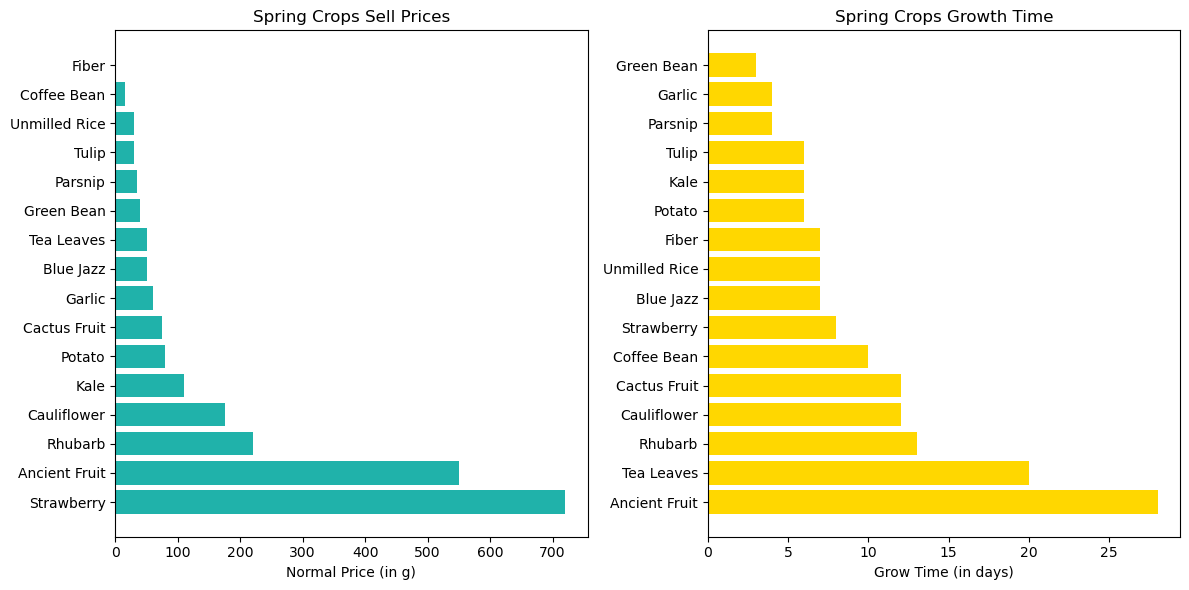

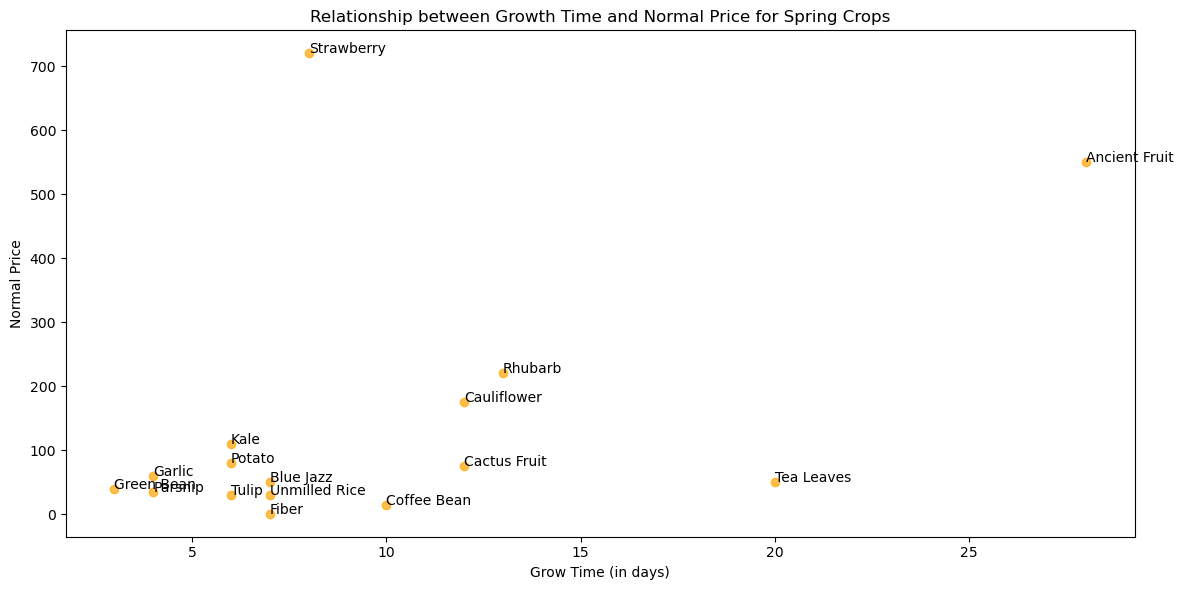

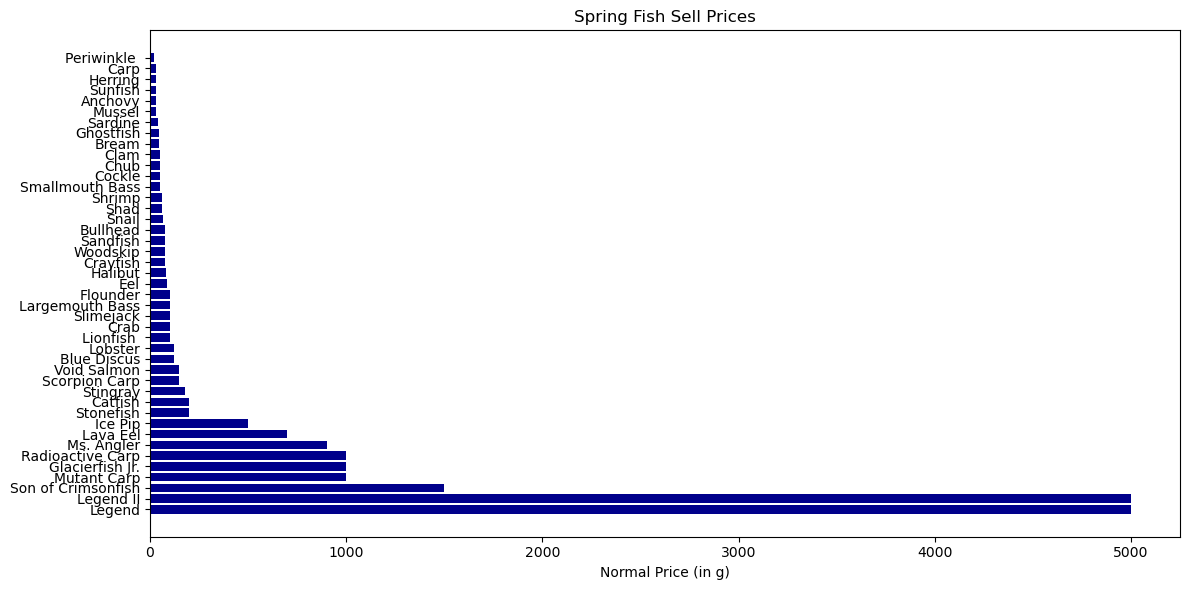

In [20]:
# Figure 1 
fig1, ax1 = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Spring crops
ax1[0].barh(sorted_spring_crops_data['Name'], sorted_spring_crops_data['Normal Price'], color='lightseagreen')
ax1[0].set_xlabel('Normal Price (in g)')
ax1[0].set_title('Spring Crops Sell Prices')

# Plot for Spring Grow Time
ax1[1].barh(sorted_spring_gt_data['Name'], sorted_spring_gt_data['Grow Time'], color='gold')
ax1[1].set_xlabel('Grow Time (in days)')
ax1[1].set_title('Spring Crops Growth Time')

plt.tight_layout()
plt.show()

#Figure 8
plt.figure(figsize=(12, 6))

# Scatter plot for Spring crops growth time vs. normal price 
plt.scatter(sorted_spring_crops_data['Grow Time'], sorted_spring_crops_data['Normal Price'], color='orange', alpha=0.7)
plt.xlabel('Grow Time (in days)')
plt.ylabel('Normal Price')
plt.title('Relationship between Growth Time and Normal Price for Spring Crops')

# Annotates each dot with crop name
for i, txt in enumerate(sorted_spring_crops_data['Name']):
    plt.annotate(txt, (sorted_spring_crops_data['Grow Time'].iloc[i], sorted_spring_crops_data['Normal Price'].iloc[i]))

plt.tight_layout()
plt.show()

# Figure 5
plt.figure(figsize=(12, 6))

# Plot for Spring fish 
plt.barh(sorted_spring_fish_data['Name'], sorted_spring_fish_data['Normal Price'], color='darkblue')
plt.xlabel('Normal Price (in g)')
plt.title('Spring Fish Sell Prices')

plt.tight_layout()
plt.show()

### ✿ Insights from the spring graphs ✿

<b>Spring Crops:</b> The 'Spring Crops Sell Prices' graph illustrates the most profitable crops in ascending order. Initially, it might seem that 'Strawberry,' 'Ancient Fruit,' and 'Rhubarb' are the optimal choices for planting. However, rushing to this conclusion overlooks a crucial factor: growth time. The 'Spring Crops Growth Time' graph reveals that 'Ancient Fruit' takes an entire season of 28 days to mature. Additionally, by viewing the Growth Time x Normal Price scatterplot, it is easy to quickly visualize which are the most profitable crops by seeing the ones that are higher in the y-axis, but lower in the x-axis. Hence, considering both profit and growth time, here are the top three most profitable spring crops:

<b>Top Three Spring Crops</b>

<ol>
    <li><b>Strawberry –</b> Growth time: 8 days, regrows 6 times during spring. Sells for 120g (total 720g).</li>
    <li><b>Rhubarb –</b> Growth time: 13 days. Sells for 220g.</li>
    <li><b>Cauliflower –</b> Growth time: 12 days. Sells for 175g.</li>
</ol>

<b>Spring Fish:</b> The 'Spring Fish Sell Prices' graph depicts the most profitable fish in ascending order. Upon analysis, here are the consistenly high-value fish and top changing fish available in spring:

<b>Consistent High-Value Fish</b>
<ol>
    <li><b>Legend and Legend II:</b> Sells for 5000g.</li>
    <li><b>Son of Crimsonfish:</b> Sells for 1500g.</li>
    <li><b>Mutant Carp, Glacierfish Jr., Radioactive Carp:</b> Sells for 1000g.</li>
    <li><b>Lava Eel:</b> Sells for 700g.</li>
    <li><b>Ice Pip:</b> Sells for 500g.</li>
</ol>

<b>Top Changing Spring Fish</b>
<ol>
    <li><b>Stone Fish and Catfish:</b> Sells for 200g.</li>
    <li><b>Stingray:</b> Sells for 180g.</li>
    <li><b>Scorpion Carp and Void Salmon:</b> Sells for 150g.</li>
</ol> 

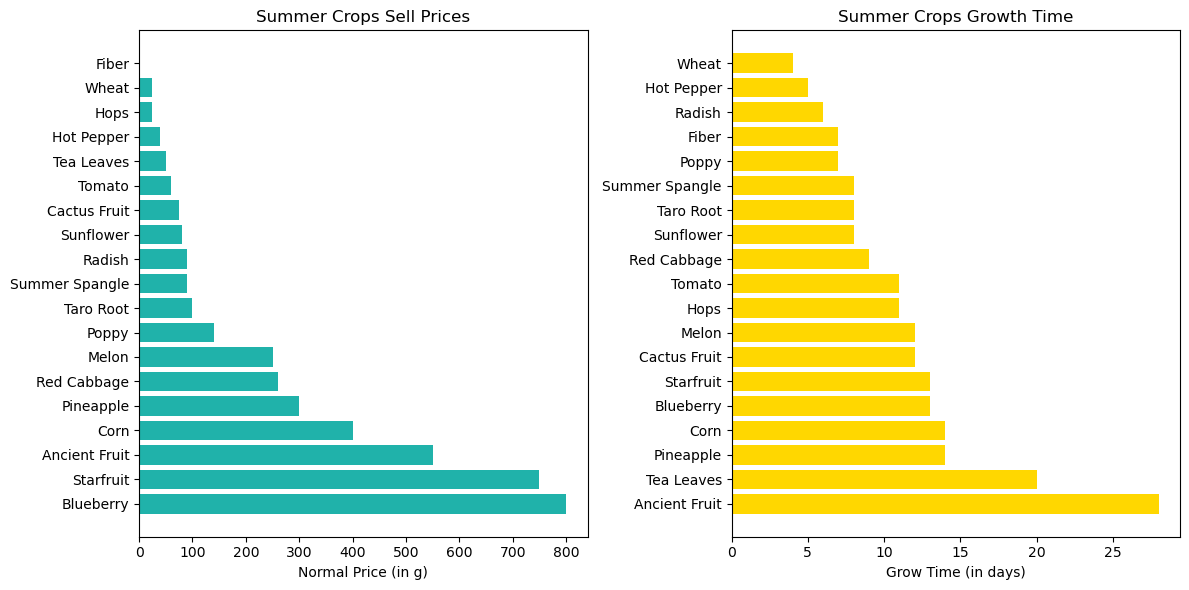

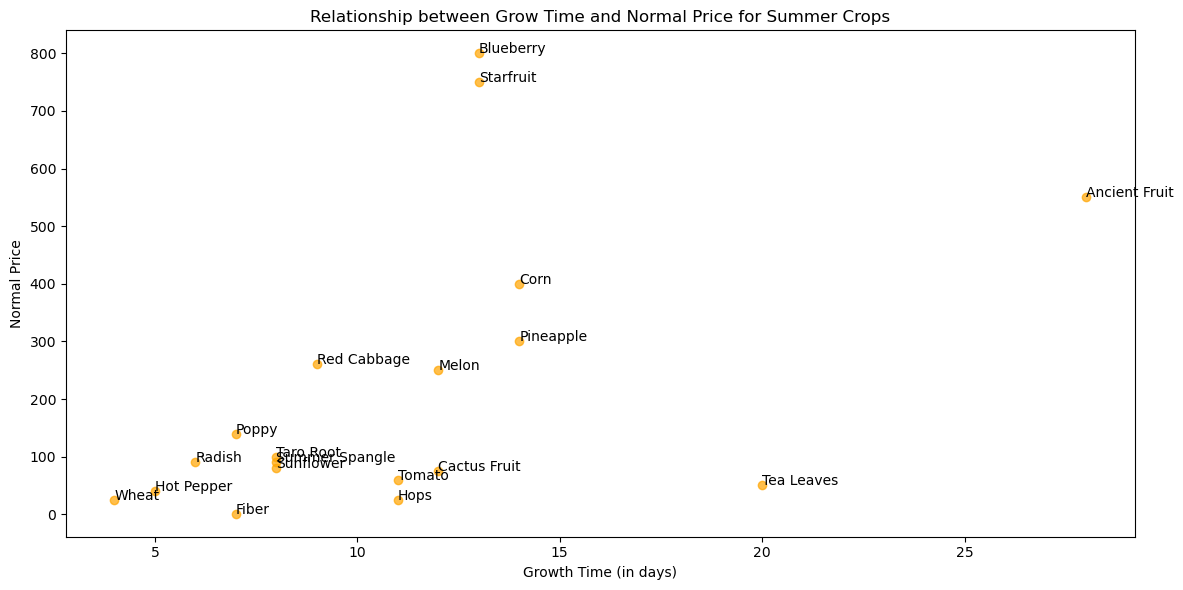

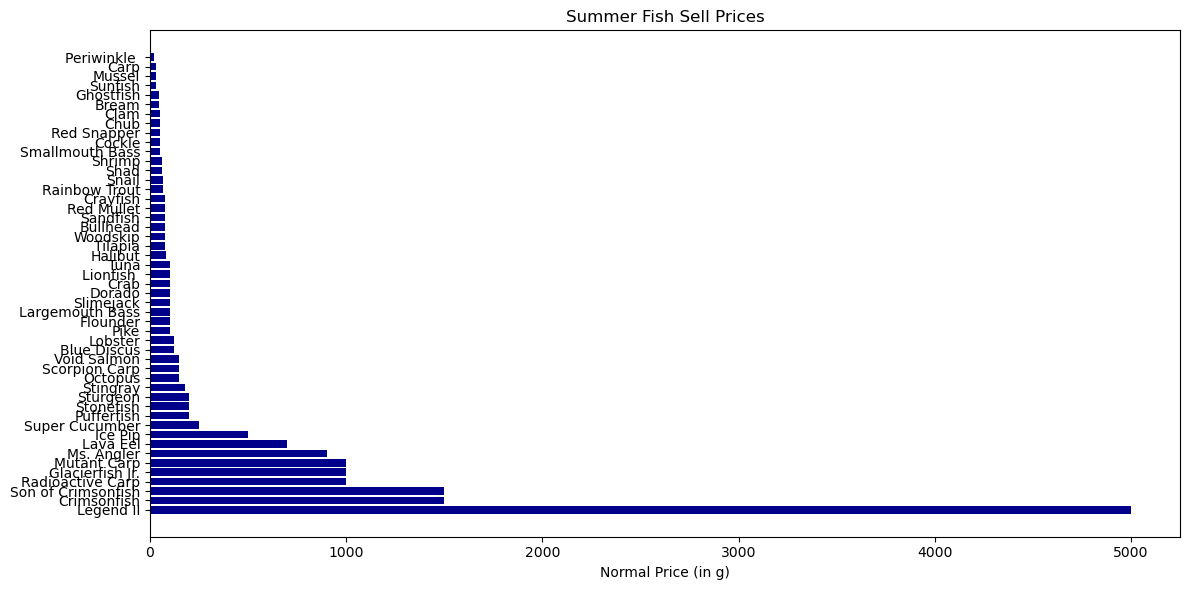

In [21]:
# Figure 2
fig2, ax2 = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Summer crops
ax2[0].barh(sorted_summer_crops_data['Name'], sorted_summer_crops_data['Normal Price'], color='lightseagreen')
ax2[0].set_xlabel('Normal Price (in g)')
ax2[0].set_title('Summer Crops Sell Prices')

# Plot for Summer Grow Time
ax2[1].barh(sorted_summer_gt_data['Name'], sorted_summer_gt_data['Grow Time'], color='gold')
ax2[1].set_xlabel('Grow Time (in days)')
ax2[1].set_title('Summer Crops Growth Time')

plt.tight_layout()
plt.show()


# Figure 9
plt.figure(figsize=(12, 6))

# Scatter plot for Summer crops growth time vs. normal price 
plt.scatter(sorted_summer_crops_data['Grow Time'], sorted_summer_crops_data['Normal Price'], color='orange', alpha=0.7)
plt.xlabel('Growth Time (in days)')
plt.ylabel('Normal Price')
plt.title('Relationship between Grow Time and Normal Price for Summer Crops')

# Annotate each dot with crop name
for i, txt in enumerate(sorted_summer_crops_data['Name']):
    plt.annotate(txt, (sorted_summer_crops_data['Grow Time'].iloc[i], sorted_summer_crops_data['Normal Price'].iloc[i]))

plt.tight_layout()
plt.show()

# Figure 6
plt.figure(figsize=(12, 6))

# Plot for Summer fish  
plt.barh(sorted_summer_fish_data['Name'], sorted_summer_fish_data['Normal Price'], color='darkblue')
plt.xlabel('Normal Price (in g)')
plt.title('Summer Fish Sell Prices')

plt.tight_layout()
plt.show()

### ✿ Insights from the summer graphs ✿

<b>Summer Crops:</b> The 'Summer Crops Sell Prices' graph illustrates the most profitable crops in ascending order. Similar to the spring crop graph, drawing immediate conclusions based solely on crop profit graphs can be misleading. However, in this instance, the most profitable crop grows within a very convenient time frame. Additionally, by viewing the Growth Time x Normal Price scatterplot, it is easy to quickly visualize which are the most profitable crops by seeing the ones that are higher in the y-axis, but lower in the x-axis. Therefore, after considering both profit and time, here are the top three most profitable summer crops:

<b>Top Three Summer Crops</b>

<ol>
    <li><b>Blueberry:</b> Growth time: 13 days. Sells for 50g and gives 3-4 blueberries per bush. Regrows 4 times during summer (total 800g, assuming the player collects 4 blueberries each time).</li>
    <li><b>Starfruit:</b> Growth time: 13 days. Sells for 750g.</li>
    <li><b>Corn:</b> Growth time: 14 days. Sells for 50g and gives 1-2 corns per stalk. Regrows 4 times during summer (total 400g, assuming the player collects 2 corns each time).</li>
</ol>

<b>Summer Fish:</b> The 'Summer Fish Sell Prices' graph showcases the most profitable fish in ascending order. After analyzing the graph, here are the consistenly high-value fish and top changing fish available during summer:

<b>Consistent High-Value Fish</b>
<ol>
    <li><b>Legend II:</b> Sells for 5000g.</li>
    <li><b>Crimsonfish and Son of Crimsonfish:</b> Sells for 1500g.</li>
    <li><b>Mutant Carp, Glacierfish Jr., Radioactive Carp:</b> Sells for 1000g.</li>
    <li><b>Lava Eel:</b> Sells for 700g.</li>
    <li><b>Ice Pip:</b> Sells for 500g.</li>
</ol>

<b>Top Three Changing Summer Fish</b>
<ol>
    <li><b>Super Cucumber:</b> Sells for 250g.</li>
    <li><b>Pufferfish, Stonefish and Sturgeon:</b> Sells for 200g.</li>
    <li><b>Stingray:</b> Sells for 180g.</li>
</ol> 

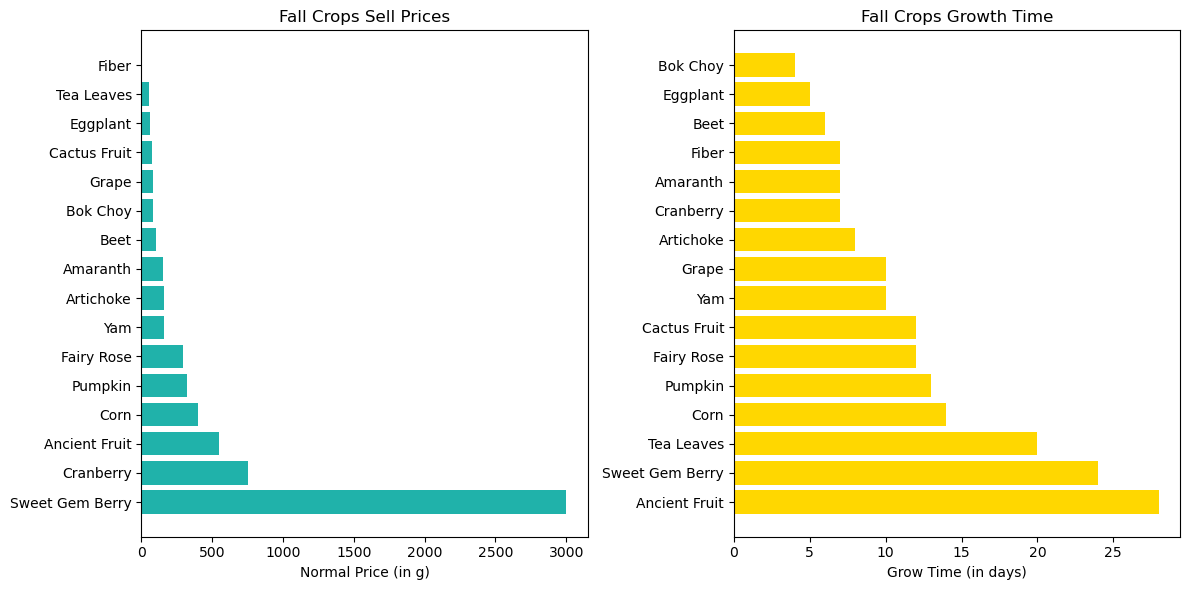

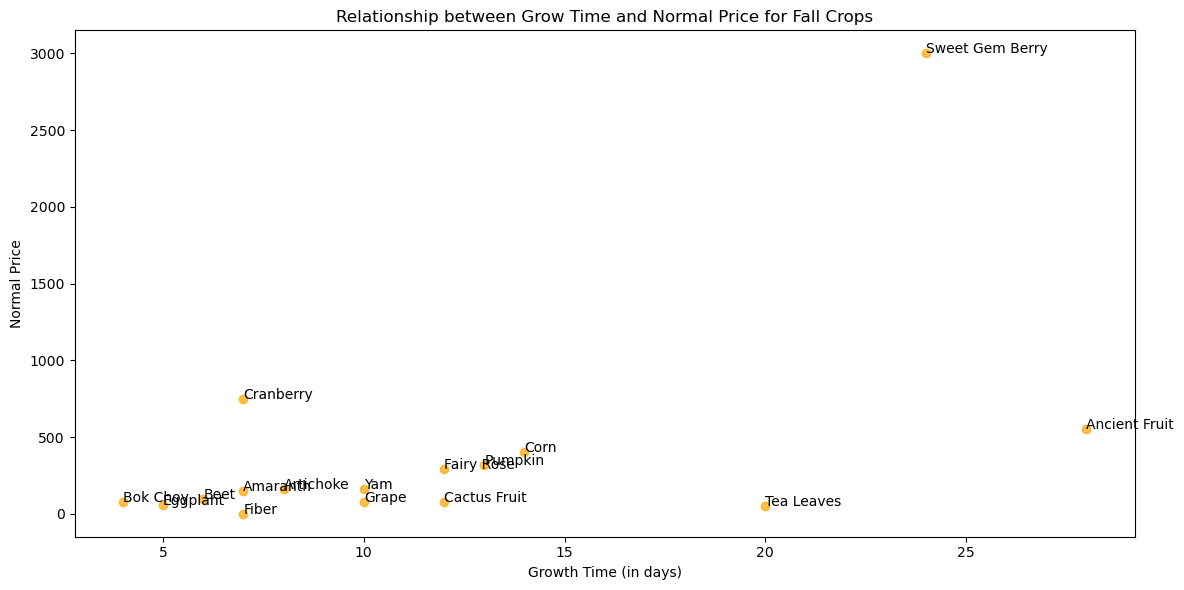

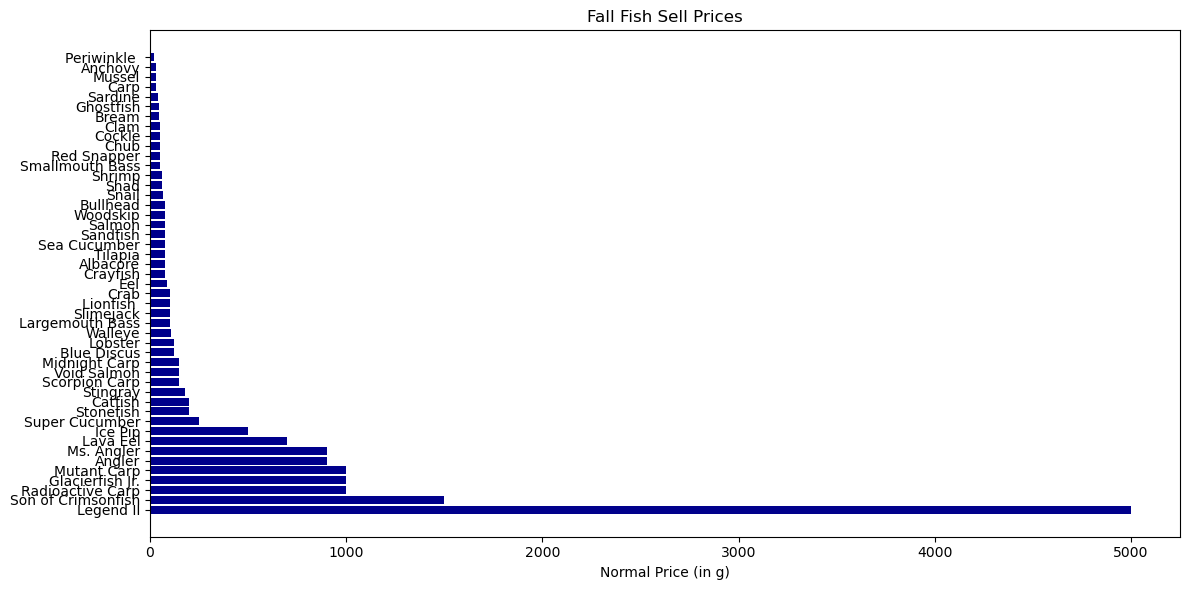

In [22]:
# Figure 3
fig3, ax3 = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Fall crops
ax3[0].barh(sorted_fall_crops_data['Name'], sorted_fall_crops_data['Normal Price'], color='lightseagreen')
ax3[0].set_xlabel('Normal Price (in g)')
ax3[0].set_title('Fall Crops Sell Prices')

# Plot for Fall Grow Time
ax3[1].barh(sorted_fall_gt_data['Name'], sorted_fall_gt_data['Grow Time'], color='gold')
ax3[1].set_xlabel('Grow Time (in days)')
ax3[1].set_title('Fall Crops Growth Time')

plt.tight_layout()
plt.show()

# Figure 10
plt.figure(figsize=(12, 6))

# Scatter plot for Fall crops growth time vs. normal price 
plt.scatter(sorted_fall_crops_data['Grow Time'], sorted_fall_crops_data['Normal Price'], color='orange', alpha=0.7)
plt.xlabel('Growth Time (in days)')
plt.ylabel('Normal Price')
plt.title('Relationship between Grow Time and Normal Price for Fall Crops')

# Annotate each dot with crop name
for i, txt in enumerate(sorted_fall_crops_data['Name']):
    plt.annotate(txt, (sorted_fall_crops_data['Grow Time'].iloc[i], sorted_fall_crops_data['Normal Price'].iloc[i]))

plt.tight_layout()
plt.show()

# Figure 7
plt.figure(figsize=(12, 6))

# Plot for Fall fish  
plt.barh(sorted_fall_fish_data['Name'], sorted_fall_fish_data['Normal Price'], color='darkblue')
plt.xlabel('Normal Price (in g)')
plt.title('Fall Fish Sell Prices')

plt.tight_layout()
plt.show()

### ✿ Insights from the fall graphs ✿

<b>Fall Crops:</b> The 'Fall Crops Sell Prices' graph showcases the most profitable crops in ascending order. Similar to previous crop graphs, drawing immediate conclusions based solely on crop profit graphs might be misleading. Additionally, by viewing the Growth Time x Normal Price scatterplot, it is easy to quickly visualize which are the most profitable crops by seeing the ones that are higher in the y-axis, but lower in the x-axis. Therefore, after considering both profit and growth time, here are the top three most profitable fall crops:

<b>Top Three Fall Crops</b>

<ol>
    <li><b>Cranberry:</b> Growth time: 7 days. Sells for 50g and gives 2 cranberries per bush. Regrows 5 times during fall (total 750g).</li>
    <li><b>Corn:</b> Growth time: 14 days. Sells for 50g and gives 1-2 corns per stalk. Regrows 4 times during summer (total 400g, assuming the player collects 2 corns each time).</li>
    <li><b>Pumpkin:</b> Growth time: 13 days. Sells for 320g.</li>
</ol>

<b>Sweet Gem Berry Info:</b> Despite having the highest selling price of all crops in the game, this berry is a rare seed; therefore, it is not a viable option considering that players will likely only have one sweet gem berry seed per season. 

<b>Fall Fish:</b> The 'Fall Fish Sell Prices' graph presents the most profitable fish in ascending order. After analyzing the graph, here are the consistenly high-value fish and top changing fish available during fall:

<b>Consistent High-Value Fish</b>
<ol>
    <li><b>Legend II:</b> Sells for 5000g.</li>
    <li><b>Son of Crimsonfish:</b> Sells for 1500g.</li>
    <li><b>Mutant Carp, Glacierfish Jr., Radioactive Carp:</b> Sells for 1000g.</li>
    <li><b>Lava Eel:</b> Sells for 700g.</li>
    <li><b>Ice Pip:</b> Sells for 500g.</li>
</ol>

<b>Top Three Changing Fall Fish</b>
<ol>
    <li><b>Super Cucumber:</b> Sells for 250g.</li>
    <li><b>Stonefish and Catfish:</b> Sells for 200g.</li>
    <li><b>Stingray:</b> Sells for 180g.</li>
</ol> 

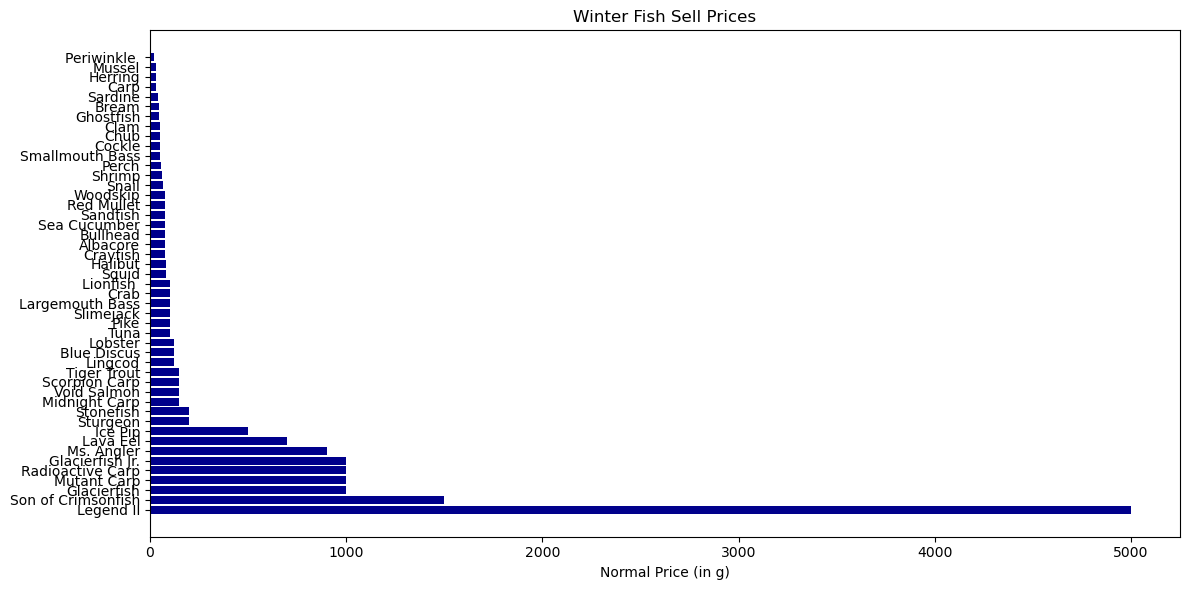

In [23]:
#Figure 4
plt.figure(figsize=(12, 6))

# Plot for Winter crops growth time 
plt.barh(sorted_winter_fish_data['Name'], sorted_winter_fish_data['Normal Price'], color='darkblue')
plt.xlabel('Normal Price (in g)')
plt.title('Winter Fish Sell Prices')

plt.tight_layout()
plt.show()

### ✿ Insights from the winter graphs ✿

Since there are no crops that grow during winter, let's get right into the winter fish analysis!

<b>Winter Fish:</b> The 'Winter Fish Sell Prices' graph displays the most profitable fish in ascending order. After analyzing the graph, here are the consistenly high-value fish and top changing fish available during winter:

<b>Consistent High-Value Fish</b>
<ol>
    <li><b>Legend II:</b> Sells for 5000g.</li>
    <li><b>Son of Crimsonfish:</b> Sells for 1500g.</li>
    <li><b>Mutant Carp, Glacierfish Jr., Radioactive Carp:</b> Sells for 1000g.</li>
    <li><b>Lava Eel:</b> Sells for 700g.</li>
    <li><b>Ice Pip:</b> Sells for 500g.</li>
</ol>

<b>Top Three Changing Winter Fish</b>
<ol>
    <li><b>Sturgeon and Stonefish:</b> Sells for 200g.</li>
    <li><b>Midnight Carp, Void Salmon, Scorpion Carp and Tiger Trout:</b> Sells for 150g.</li>
    <li><b>Lingcod, Blue Discus and Lobster:</b> Sells for 120g.</li>
</ol> 

# ✧Conclusions✧

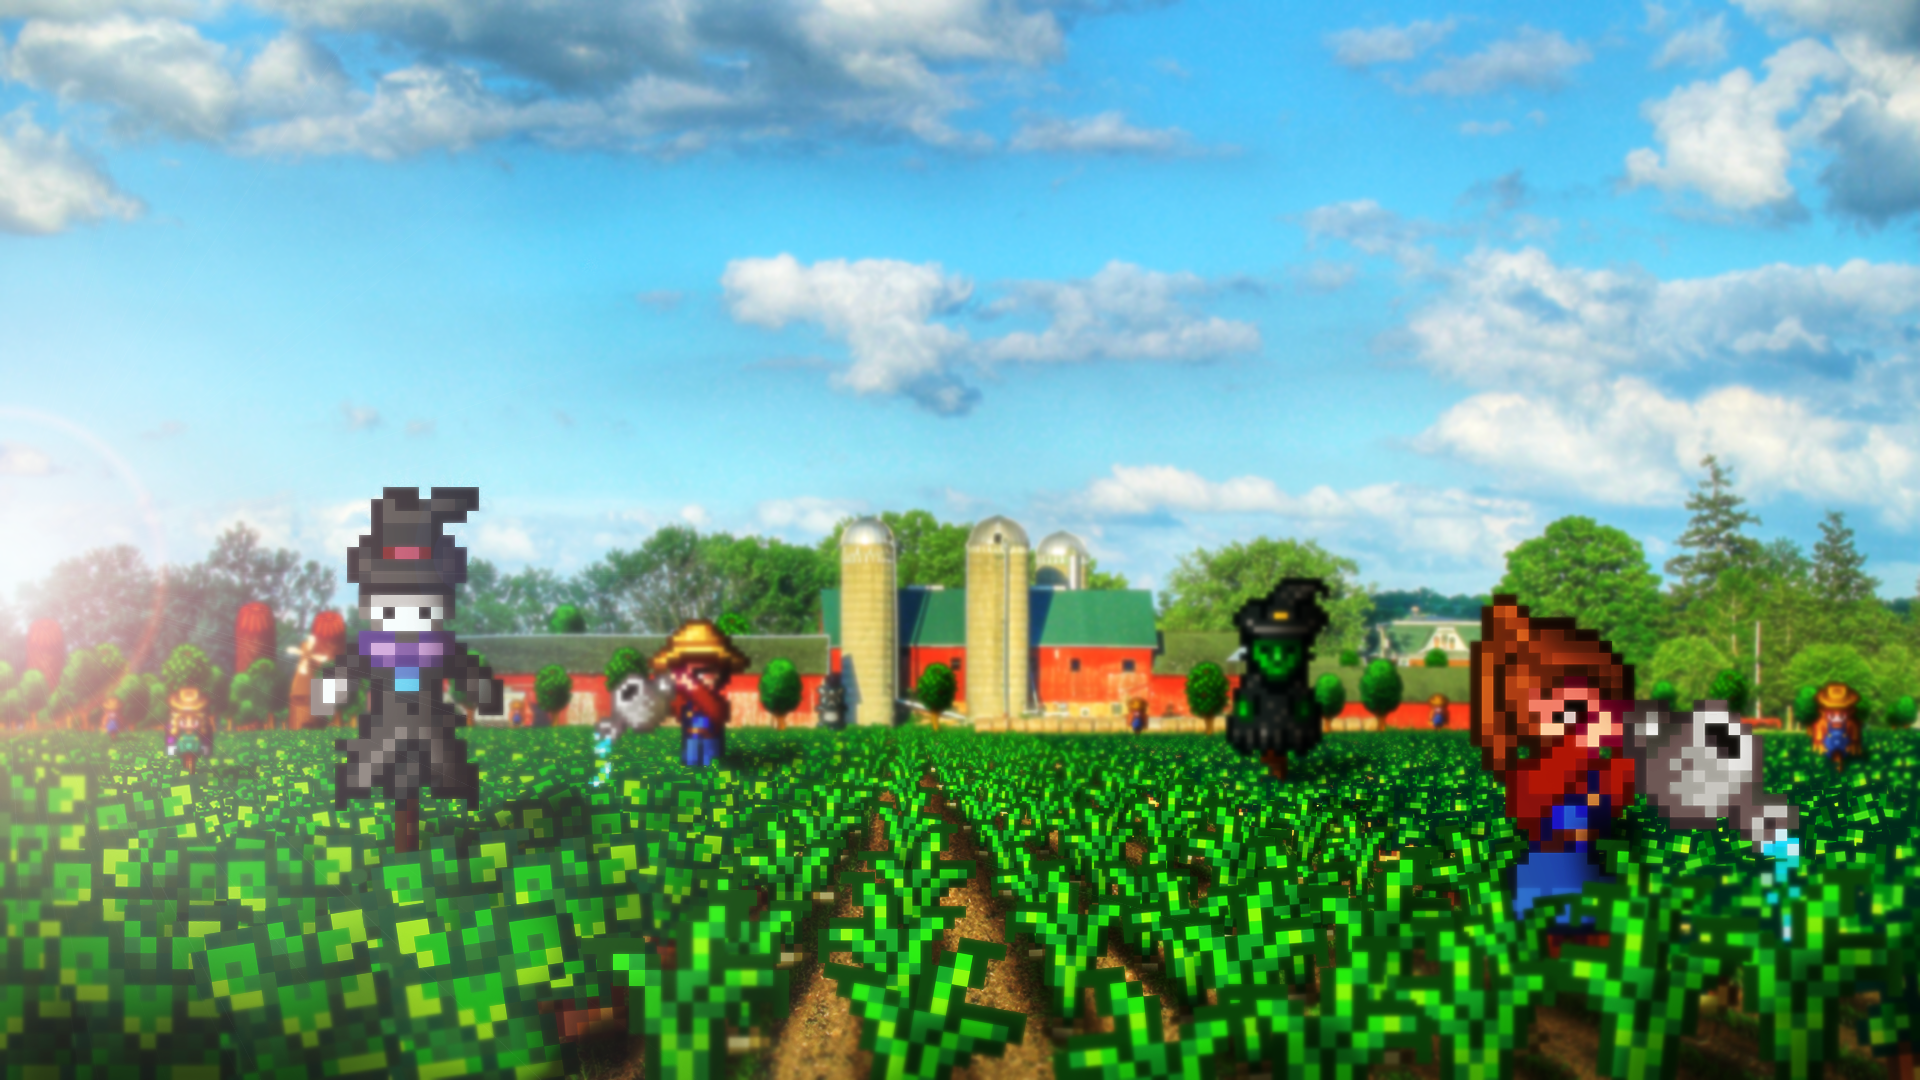
_Stardew Valley Wallpaper by Blue Casters on DeviantArt_

Finally, after collecting, organizing, visualizing, and analyzing the data, I was able to uncover the most profitable crops and fish for each season in Stardew Valley! Here's a complete list:

### Consistent High-Value Fish Across All Seasons
<ol>
    <li><b>Legend II:</b> Sells for 5000g.</li>
    <li><b>Son of Crimsonfish:</b> Sells for 1500g.</li>
    <li><b>Mutant Carp, Glacierfish Jr., Radioactive Carp:</b> Sells for 1000g.</li>
    <li><b>Lava Eel:</b> Sells for 700g.</li>
    <li><b>Ice Pip:</b> Sells for 500g.</li>
</ol>

### Spring Crops
<ol>
    <li><b>Strawberry:</b> Growth time - 8 days. Regrows 6 times during spring. Sells for 120g (total 720g).</li>
    <li><b>Rhubarb:</b> Growth time - 13 days. Sells for 220g.</li>
    <li><b>Cauliflower:</b> Growth time - 12 days. Sells for 175g.</li>
</ol>

### Spring Fish
<ol>
    <li><b>Stonefish and Catfish:</b> Sells for 200g.</li>
    <li><b>Stingray:</b> Sells for 180g.</li>
    <li><b>Scorpion Carp and Void Salmon:</b> Sells for 150g.</li>
</ol> 

### Summer Crops
<ol>
    <li><b>Blueberry:</b> Growth time - 13 days. Regrows 4 times during summer (total 800g).</li>
    <li><b>Starfruit:</b> Growth time - 13 days. Sells for 750g.</li>
    <li><b>Corn:</b> Growth time - 14 days. Regrows 4 times during summer (total 400g).</li>
</ol>

### Summer Fish
<ol>
    <li><b>Super Cucumber:</b> Sells for 250g.</li>
    <li><b>Pufferfish, Stonefish and Sturgeon:</b> Sells for 200g.</li>
    <li><b>Stingray:</b> Sells for 180g.</li>
</ol> 

### Fall Crops
<ol>
    <li><b><b>Cranberry:</b> Growth time - 7 days. Regrows 5 times during fall (total 750g).</li>
    <li><b><b>Corn:</b> Growth time - 14 days. Regrows 4 times during the summer (total 400g).</li>
    <li><b><b>Pumpkin:</b> Growth time - 13 days. Sells for 320g.</li>
</ol>

### Fall Fish
<ol>
    <li><b>Super Cucumber:</b> Sells for 250g.</li>
    <li><b>Stonefish and Catfish:</b> Sells for 200g.</li>
    <li><b>Stingray:</b> Sells for 180g.</li>
</ol> 

### Winter Fish
<ol>
    <li><b>Sturgeon and Stonefish:</b> Sells for 200g.</li>
    <li><b>Midnight Carp, Void Salmon, Scorpion Carp and Tiger Trout:</b> Sells for 150g.</li>
    <li><b>Lingcod, Blue Discus and Lobster:</b> Sells for 120g.</li>
</ol> 

# ✧The Hypothesis✧

My initial hypothesis for this project was that spring was the most profitable season, and according to my analysis, the hypothesis was correct. Spring offers high-value crops like Strawberry and Rhubarb, along with several high-value legendary fish. However, this conclusion may vary based on player strategy and available resources.

<b>There isn't an absolute answer for the most profitable season</b> due to multiple player factors influencing this. For example, planting corn in summer can make fall more profitable as the crop persists through seasons, giving profits from the beginning of fall.

## ✧Final Considerations✧

Despite the limitations of this analysis, it offers insight into the choices players can make to achieve a more profitable outcome in each season of the game. To delve deeper into the economy of crops and fishes in Stardew Valley, factors such as the randomness of crop production, player profession, use of fertilizers, and farm type could be considered and analyzed. This broader scope of analysis would provide more accurate and detailed insights.